**TAREA 3 - ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

**Realizado por:**

**LUIS CARLOS PIMIENTA HENAO**

**Grupo: 202016908_1**

**UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD**

**PROGRAMA DE INGENIERIA DE SISTEMAS**

**ANALISIS DE DATOS**

**BARRANQUILLA (ATLÁNTICO)**

**ABRIL 2024.**

**ÁRBOLES DE DECISIÓN**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
#Cargar Librerias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
#Lectura datos Pyton y se cargan las variables

Datos = pd.read_csv('winequality-red.csv')
Datos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
Datos.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
Datos.shape

(1599, 12)

In [6]:
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

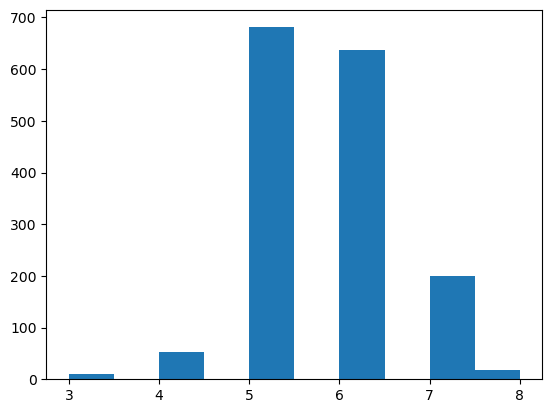

In [7]:
plt.hist(Datos.quality)

<Axes: >

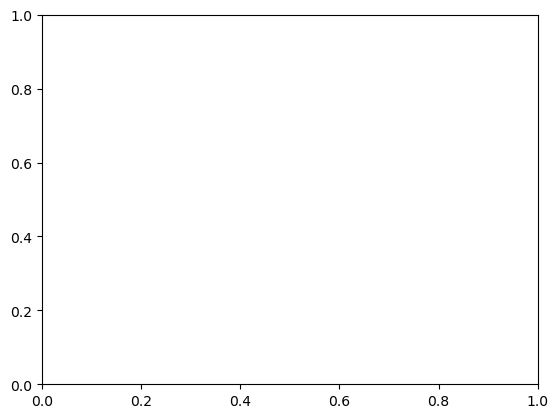

In [8]:
sns.scatterplot(X = "density", Y = "quality", alc = "alcohol", Datos = Datos)

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [9]:
print("Cantidad de Registros con cero en Acides Fija: ", Datos['fixed acidity'].isin([0]).sum())
print("Cantidad de Registros con cero en Acides Volatil: ", Datos['volatile acidity'].isin([0]).sum())
print("Cantidad de Registros con cero en Acido Citrico: ", Datos['citric acid'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar Residual: ", Datos['residual sugar'].isin([0]).sum())
print("Cantidad de Registros con cero en Cloruros: ", Datos['chlorides'].isin([0]).sum())
print("Cantidad de Registros con cero en Dióxido de Azufre Libre: ", Datos['free sulfur dioxide'].isin([0]).sum())
print("Cantidad de Registros con cero en Dióxido de Azufre Total: ", Datos['total sulfur dioxide'].isin([0]).sum())
print("Cantidad de Registros con cero en Densidad: ", Datos['density'].isin([0]).sum())
print("Cantidad de Registros con cero en pH: ", Datos['pH'].isin([0]).sum())
print("Cantidad de Registros con cero en Sulfatos: ", Datos['sulphates'].isin([0]).sum())
print("Cantidad de Registros con cero en Alcohol: ", Datos['alcohol'].isin([0]).sum())
print("Cantidad de Registros con cero en Calidad: ", Datos['quality'].isin([0]).sum())

Cantidad de Registros con cero en Acides Fija:  0
Cantidad de Registros con cero en Acides Volatil:  0
Cantidad de Registros con cero en Acido Citrico:  132
Cantidad de Registros con cero en Azucar Residual:  0
Cantidad de Registros con cero en Cloruros:  0
Cantidad de Registros con cero en Dióxido de Azufre Libre:  0
Cantidad de Registros con cero en Dióxido de Azufre Total:  0
Cantidad de Registros con cero en Densidad:  0
Cantidad de Registros con cero en pH:  0
Cantidad de Registros con cero en Sulfatos:  0
Cantidad de Registros con cero en Alcohol:  0
Cantidad de Registros con cero en Calidad:  0


In [10]:
Datos.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
Datos['fixed acidity'] = Datos['fixed acidity'].astype(int)
Datos['volatile acidity'] = Datos['volatile acidity'].astype(int)
Datos['citric acid'] = Datos['citric acid'].astype(int)
Datos['residual sugar'] = Datos['residual sugar'].astype(int)
Datos['chlorides'] = Datos['chlorides'].astype(int)
Datos['free sulfur dioxide'] = Datos['free sulfur dioxide'].astype(int)
Datos['total sulfur dioxide'] = Datos['total sulfur dioxide'].astype(int)
Datos['density'] = Datos['density'].astype(int)
Datos['pH'] = Datos['pH'].astype(int)
Datos['sulphates'] = Datos['sulphates'].astype(int)
Datos['alcohol'] = Datos['alcohol'].astype(int)
Datos['quality'] = Datos['quality'].astype(int)

In [12]:
Datos.dtypes #Se convierten los tipos de datos en enteros: int

fixed acidity           int32
volatile acidity        int32
citric acid             int32
residual sugar          int32
chlorides               int32
free sulfur dioxide     int32
total sulfur dioxide    int32
density                 int32
pH                      int32
sulphates               int32
alcohol                 int32
quality                 int32
dtype: object

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

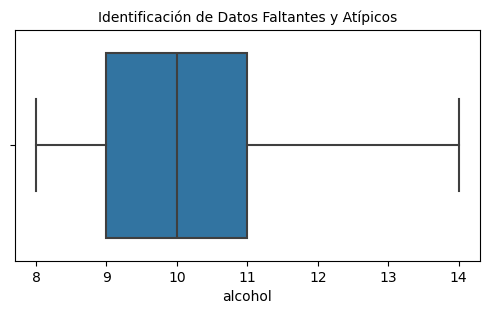

In [13]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['alcohol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

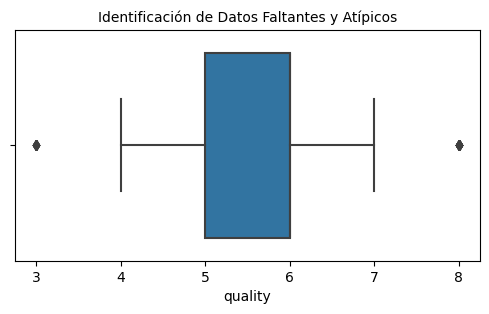

In [14]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['quality'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

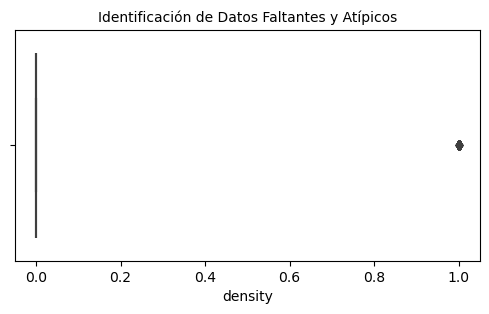

In [15]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['density'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [16]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         1599 non-null   int32
 1   volatile acidity      1599 non-null   int32
 2   citric acid           1599 non-null   int32
 3   residual sugar        1599 non-null   int32
 4   chlorides             1599 non-null   int32
 5   free sulfur dioxide   1599 non-null   int32
 6   total sulfur dioxide  1599 non-null   int32
 7   density               1599 non-null   int32
 8   pH                    1599 non-null   int32
 9   sulphates             1599 non-null   int32
 10  alcohol               1599 non-null   int32
 11  quality               1599 non-null   int32
dtypes: int32(12)
memory usage: 75.1 KB


**3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [17]:
# Grado nivel de alcohol en vino

Datos[['alcohol']].value_counts()

alcohol
9          673
10         452
11         305
12         133
13          21
14           8
8            7
Name: count, dtype: int64

In [18]:
# Acides Citrica del Vino

Datos[['citric acid']].value_counts()

citric acid
0              1598
1                 1
Name: count, dtype: int64

In [19]:
# Densidad del Vino

Datos[['density']].value_counts()

density
0          1518
1            81
Name: count, dtype: int64

In [20]:
# Calidad del Vino

Datos[['quality']].value_counts()

quality
5          681
6          638
7          199
4           53
8           18
3           10
Name: count, dtype: int64

In [50]:
Datos[['alcohol','quality','density','citric acid', 'pH']].head(10)

,alcohol,quality,density,citric acid,pH
0,9,5,0,0,3
1,9,5,0,0,3
2,9,5,0,0,3
3,9,6,0,0,3
4,9,5,0,0,3
5,9,5,0,0,3
6,9,5,0,0,3
7,10,7,0,0,3
8,9,7,0,0,3
9,10,5,0,0,3


**4.	Dividir el dataset en Train y Test para evaluar correctamente el modelo.**

**Train y Test 1** 

In [51]:
X = Datos.drop('quality',axis=1)
Y = Datos['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [23]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
51                6                 0            0               2          0   
987               7                 0            0               1          0   
1278              8                 0            0               2          0   
208               7                 0            0               2          0   
944               8                 0            0               3          0   
...             ...               ...          ...             ...        ...   
316               9                 0            0               3          0   
233               6                 0            0               2          0   
412               7                 0            0               1          0   
772               9                 0            0               2          0   
702               7                 0            0               2          0   

      free sulfur dioxide  

In [24]:
print(Y_train)

51      6
987     5
1278    6
208     5
944     7
       ..
316     5
233     5
412     5
772     5
702     6
Name: quality, Length: 1199, dtype: int32


**Train y Test 2**

In [52]:
X = Datos[['alcohol','density','pH','citric acid']]
Y = Datos['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [53]:
print (X_train)

      alcohol  density  pH  citric acid
140         9        0   3            0
1232        9        0   3            0
720         9        0   3            0
77         10        0   3            0
39         10        0   3            0
...       ...      ...  ..          ...
763         9        0   3            0
835         9        0   3            0
1216        9        0   3            0
559        12        1   3            0
684         9        0   3            0

[1199 rows x 4 columns]


In [54]:
print (Y_train)

140     5
1232    5
720     5
77      6
39      5
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1199, dtype: int32


**Train y Test 3**

In [28]:
X = Datos.iloc[:,1:10]

Y = Datos.iloc[:,9]

X.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0,0,1,0,11,34,0,3,0
1,0,0,2,0,25,67,0,3,0
2,0,0,2,0,15,54,0,3,0
3,0,0,1,0,17,60,0,3,0
4,0,0,1,0,11,34,0,3,0


**Train y Test 4**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 140 to 684
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   alcohol      1199 non-null   int32
 1   density      1199 non-null   int32
 2   pH           1199 non-null   int32
 3   citric acid  1199 non-null   int32
dtypes: int32(4)
memory usage: 28.1 KB


In [31]:
explicativas = Datos.drop(columns='quality')#(Seleccionamos todas las columnas menos la columna de Calidad)
objetivos = Datos.quality #(Seleccionamos la columna objetivo alcohol)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [33]:
Arbol = DecisionTreeClassifier(max_depth=3)

In [34]:
Arbol.fit(X=explicativas, y=objetivos)

DecisionTreeClassifier(max_depth=3)

In [35]:
from sklearn.tree import plot_tree

<Figure size 1000x600 with 0 Axes>

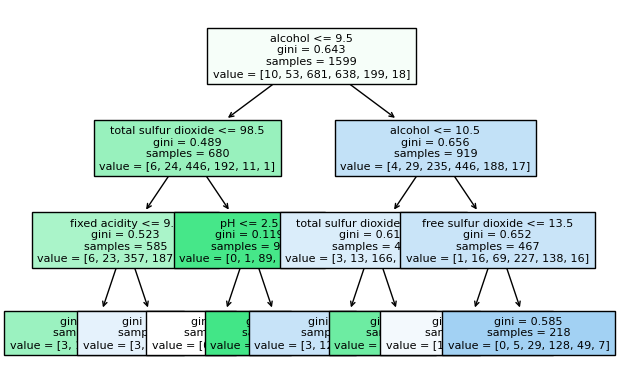

<Figure size 1000x600 with 0 Axes>

In [36]:
plot_tree(decision_tree=Arbol, feature_names=explicativas.columns, filled = True, fontsize = 8);
plt.figure(figsize=(10,6)) #Grafica las dimensiones de la imagen

[Text(0.5, 0.875, 'x[10] <= 9.5\ngini = 0.643\nsamples = 1599\nvalue = [10, 53, 681, 638, 199, 18]'),
 Text(0.25, 0.625, 'x[6] <= 98.5\ngini = 0.489\nsamples = 680\nvalue = [6, 24, 446, 192, 11, 1]'),
 Text(0.125, 0.375, 'x[0] <= 9.5\ngini = 0.523\nsamples = 585\nvalue = [6, 23, 357, 187, 11, 1]'),
 Text(0.0625, 0.125, 'gini = 0.488\nsamples = 500\nvalue = [3, 19, 325, 148, 5, 0]'),
 Text(0.1875, 0.125, 'gini = 0.639\nsamples = 85\nvalue = [3, 4, 32, 39, 6, 1]'),
 Text(0.375, 0.375, 'x[8] <= 2.5\ngini = 0.119\nsamples = 95\nvalue = [0, 1, 89, 5, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 0, 2, 2, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.085\nsamples = 91\nvalue = [0, 1, 87, 3, 0, 0]'),
 Text(0.75, 0.625, 'x[10] <= 10.5\ngini = 0.656\nsamples = 919\nvalue = [4, 29, 235, 446, 188, 17]'),
 Text(0.625, 0.375, 'x[6] <= 79.0\ngini = 0.617\nsamples = 452\nvalue = [3, 13, 166, 219, 50, 1]'),
 Text(0.5625, 0.125, 'gini = 0.611\nsamples = 412\nvalue = [3, 12, 135, 213, 48

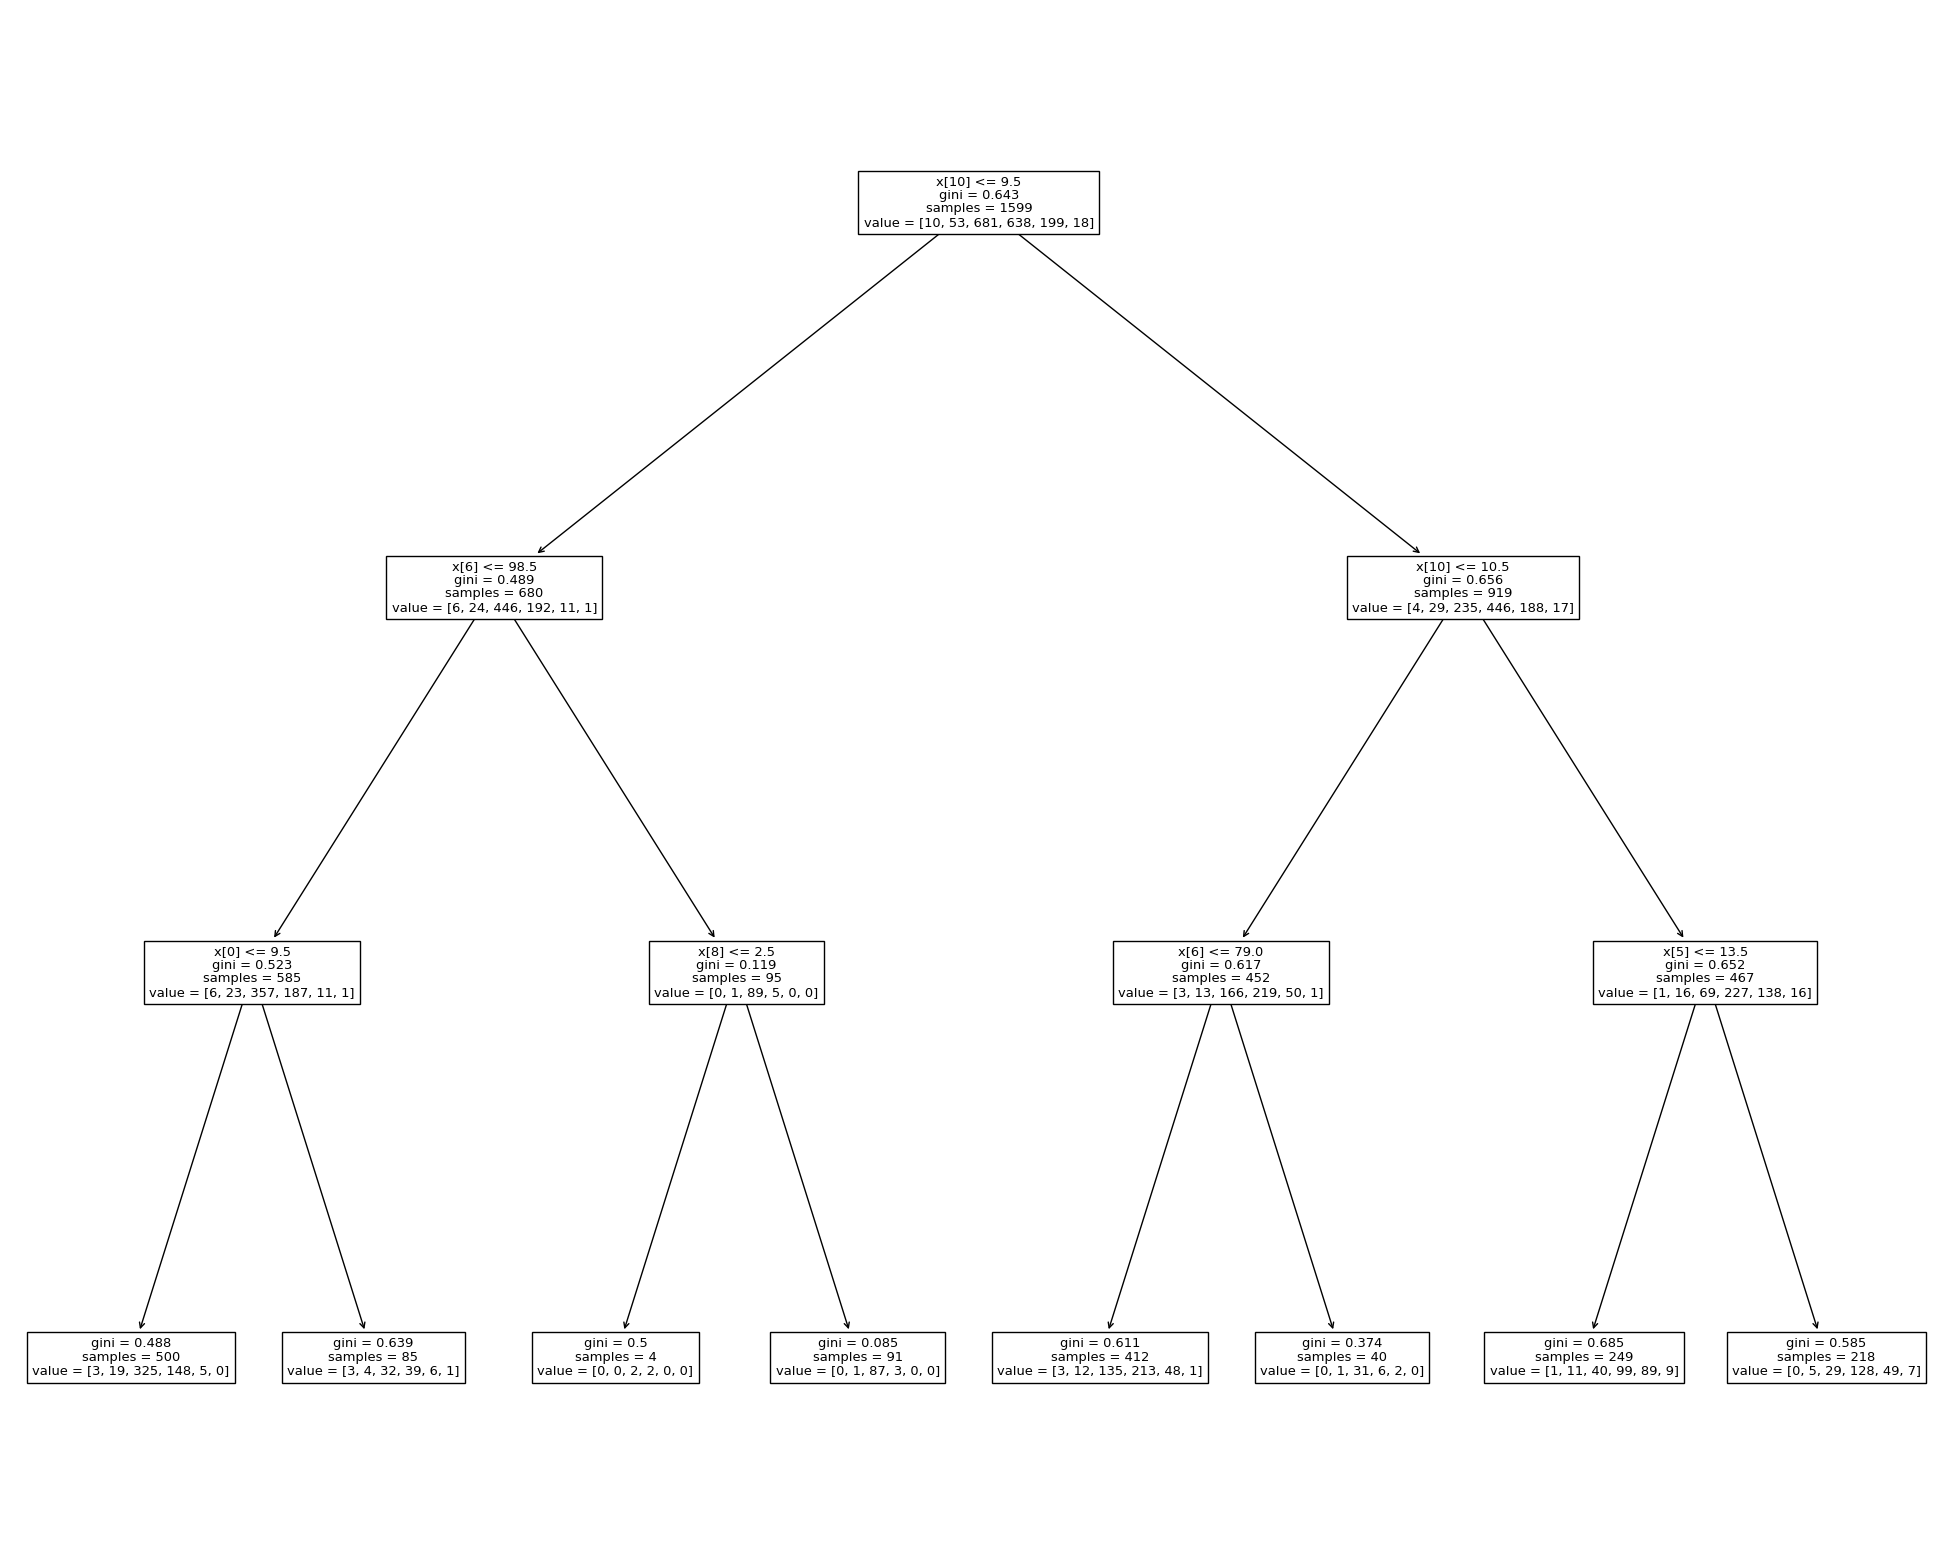

In [37]:
plt.figure(figsize=(25,20)) #Grafica las dimensiones de la imagen
plot_tree(Arbol)

**5.	Entrenar el modelo configurando los diferentes hiperparámetros.**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [55]:
X_prediccion=["density","alcohol","pH","citric acid"]
Y_target = ['quality']

In [56]:
prediccion = Datos[X_prediccion]
target = Datos[Y_target]

In [57]:
prediccion

,density,alcohol,pH,citric acid
0,0,9,3,0
1,0,9,3,0
2,0,9,3,0
3,0,9,3,0
4,0,9,3,0
...,...,...,...,...
1594,0,10,3,0
1595,0,11,3,0
1596,0,11,3,0
1597,0,10,3,0


In [42]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [43]:
corr = prediccion.corr()
corr

,density,alcohol,pH,citric acid
density,1.000000,-0.047494,-0.095582,-0.005779
alcohol,-0.047494,1.000000,0.032122,-0.022922
pH,-0.095582,0.032122,1.000000,-0.177941
citric acid,-0.005779,-0.022922,-0.177941,1.000000


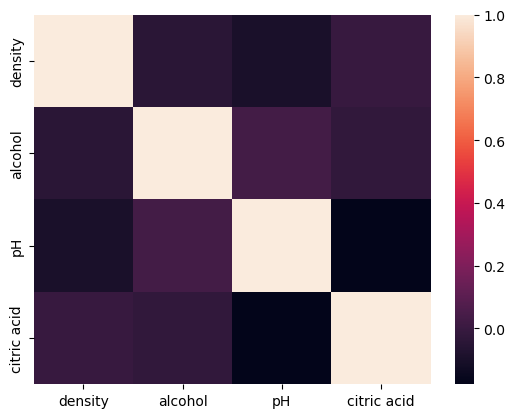

In [44]:
sns.heatmap(corr)
plt.show()

In [45]:
prediccion

,density,alcohol,pH,citric acid
0,0,9,3,0
1,0,9,3,0
2,0,9,3,0
3,0,9,3,0
4,0,9,3,0
...,...,...,...,...
1594,0,10,3,0
1595,0,11,3,0
1596,0,11,3,0
1597,0,10,3,0


**6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.**

In [46]:
from sklearn.metrics import classification_report

print(classification_report(Y, Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1540
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00         1

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



**7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

In [67]:
Y = Datos[['pH','quality','citric acid','alcohol']]
Y = Datos['density']

In [68]:
confusion_matrix(Y,Y)

array([[1518,    0],
       [   0,   81]], dtype=int64)

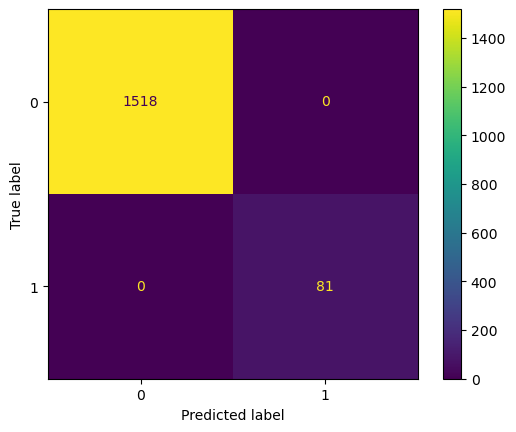

In [69]:
cm = confusion_matrix(Y,Y)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()